Представлен датасет центра приюта животных, и вашей задачей будет обучить модель таким образом, чтобы  по определенным признакам была возможность максимально уверенно предсказать метки 'Adoption' и 'Transfer' (столбец “outcome_type”).
#### Здесь вы вольны делать что угодно. Я хочу видеть от вас:
1. Проверка наличия/обработка пропусков
2. Проверьте взаимосвязи между признаками
3. Попробуйте создать свои признаки
4. Удалите лишние
5. Обратите внимание на текстовые столбцы. Подумайте, что можно извлечь полезного оттуда
6. Использование профайлера вам поможет.
7. Не забывайте, что у вас есть PCA (Метод главных компонент). Он может пригодиться.

In [1]:
from matplotlib import pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np

import pandas_profiling as pp

In [2]:
df = pd.read_csv('aac_shelter_outcomes.csv')

In [3]:
df.head()

,age_upon_outcome,animal_id,animal_type,breed,color,date_of_birth,datetime,monthyear,name,outcome_subtype,outcome_type,sex_upon_outcome
0,2 weeks,A684346,Cat,Domestic Shorthair Mix,Orange Tabby,2014-07-07T00:00:00,2014-07-22T16:04:00,2014-07-22T16:04:00,NaN,Partner,Transfer,Intact Male
1,1 year,A666430,Dog,Beagle Mix,White/Brown,2012-11-06T00:00:00,2013-11-07T11:47:00,2013-11-07T11:47:00,Lucy,Partner,Transfer,Spayed Female
2,1 year,A675708,Dog,Pit Bull,Blue/White,2013-03-31T00:00:00,2014-06-03T14:20:00,2014-06-03T14:20:00,*Johnny,NaN,Adoption,Neutered Male
3,9 years,A680386,Dog,Miniature Schnauzer Mix,White,2005-06-02T00:00:00,2014-06-15T15:50:00,2014-06-15T15:50:00,Monday,Partner,Transfer,Neutered Male
4,5 months,A683115,Other,Bat Mix,Brown,2014-01-07T00:00:00,2014-07-07T14:04:00,2014-07-07T14:04:00,NaN,Rabies Risk,Euthanasia,Unknown


In [4]:
#list(df) - получил имена столбцов и скрыл, чтобы не мешались

 **Описание таблицы:**
 - age_upon_outcome - возраст на момент выдачи
 - animal_id - id животного
 - animal_type - тип животного
 - breed - порода животного
 - color - цвет животного
 - date_of_birth - дата рождения
 - datetime - время рождения
 - monthyear - месяц год рождения
 - name - кличка животного
 - outcome_subtype - подтип выдачи 
 - outcome_type - тип выдачи
 - sex_upon_outcome - пол на момент выдачи

In [5]:
#Очищаем таблицу от ненужных целевых значений
df2goal = df[df['outcome_type'].isin(['Adoption','Transfer'])]
df2goal.head()

,age_upon_outcome,animal_id,animal_type,breed,color,date_of_birth,datetime,monthyear,name,outcome_subtype,outcome_type,sex_upon_outcome
0,2 weeks,A684346,Cat,Domestic Shorthair Mix,Orange Tabby,2014-07-07T00:00:00,2014-07-22T16:04:00,2014-07-22T16:04:00,NaN,Partner,Transfer,Intact Male
1,1 year,A666430,Dog,Beagle Mix,White/Brown,2012-11-06T00:00:00,2013-11-07T11:47:00,2013-11-07T11:47:00,Lucy,Partner,Transfer,Spayed Female
2,1 year,A675708,Dog,Pit Bull,Blue/White,2013-03-31T00:00:00,2014-06-03T14:20:00,2014-06-03T14:20:00,*Johnny,NaN,Adoption,Neutered Male
3,9 years,A680386,Dog,Miniature Schnauzer Mix,White,2005-06-02T00:00:00,2014-06-15T15:50:00,2014-06-15T15:50:00,Monday,Partner,Transfer,Neutered Male
5,4 months,A664462,Dog,Leonberger Mix,Brown/White,2013-06-03T00:00:00,2013-10-07T13:06:00,2013-10-07T13:06:00,*Edgar,Partner,Transfer,Intact Male


In [6]:
#Очищаем таблицу от столбцов 'datetime', 'monthyear', дублирующих данные в 'date_of_birth'
df2goal = df2goal.drop(['datetime', 'monthyear'], axis=1)

In [7]:
df2goal.head()

,age_upon_outcome,animal_id,animal_type,breed,color,date_of_birth,name,outcome_subtype,outcome_type,sex_upon_outcome
0,2 weeks,A684346,Cat,Domestic Shorthair Mix,Orange Tabby,2014-07-07T00:00:00,NaN,Partner,Transfer,Intact Male
1,1 year,A666430,Dog,Beagle Mix,White/Brown,2012-11-06T00:00:00,Lucy,Partner,Transfer,Spayed Female
2,1 year,A675708,Dog,Pit Bull,Blue/White,2013-03-31T00:00:00,*Johnny,NaN,Adoption,Neutered Male
3,9 years,A680386,Dog,Miniature Schnauzer Mix,White,2005-06-02T00:00:00,Monday,Partner,Transfer,Neutered Male
5,4 months,A664462,Dog,Leonberger Mix,Brown/White,2013-06-03T00:00:00,*Edgar,Partner,Transfer,Intact Male


In [8]:
df2goal.describe()

,age_upon_outcome,animal_id,animal_type,breed,color,date_of_birth,name,outcome_subtype,outcome_type,sex_upon_outcome
count,56609,56611,56611,56611,56611,56611,38660,29425,56611,56611
unique,45,52792,5,1803,475,4883,11989,6,2,5
top,1 year,A732618,Dog,Domestic Shorthair Mix,Black/White,2014-05-05T00:00:00,Bella,Partner,Adoption,Neutered Male
freq,9766,6,29570,20809,6111,97,204,19660,33112,20732


In [9]:
# В столбеце 'age_upon_outcome' не хватает двух значений. Эти строки безболезненно удаляем.
df2goal = df2goal.dropna(subset=['age_upon_outcome'])

Также можем удалить **'date_of_birth'**, так как сама дата рождения не особо нужна, а возраст на момент выдачи будет более важной характеристикой.  
Также можно удалить столбец **'name'**, так как, во-первых, кличку можно и поменять, в отличии от типа животного и его возраста, а, во-вторых, данный столбец содержит очень много пропусков.

In [10]:
df2goal.drop(['date_of_birth', 'animal_id', 'name'], axis=1, inplace=True)

In [11]:
df2goal.head()

,age_upon_outcome,animal_type,breed,color,outcome_subtype,outcome_type,sex_upon_outcome
0,2 weeks,Cat,Domestic Shorthair Mix,Orange Tabby,Partner,Transfer,Intact Male
1,1 year,Dog,Beagle Mix,White/Brown,Partner,Transfer,Spayed Female
2,1 year,Dog,Pit Bull,Blue/White,NaN,Adoption,Neutered Male
3,9 years,Dog,Miniature Schnauzer Mix,White,Partner,Transfer,Neutered Male
5,4 months,Dog,Leonberger Mix,Brown/White,Partner,Transfer,Intact Male


In [12]:
df2goal.describe()

,age_upon_outcome,animal_type,breed,color,outcome_subtype,outcome_type,sex_upon_outcome
count,56609,56609,56609,56609,29423,56609,56609
unique,45,5,1802,475,6,2,5
top,1 year,Dog,Domestic Shorthair Mix,Black/White,Partner,Adoption,Neutered Male
freq,9766,29569,20809,6111,19658,33112,20732


Остались пропуски только в столбце 'outcome_subtype'. Количество пропусков почти половина базы, поэтому есть несколько вариантов:
- наиболее часто встречающееся значение 'Partner' встречается в этом стлобце более 60% - можно заполнить пропуски модальным занчением
- ввести отдельную котегорию 'other'
- исключить столбец, так как внесение информации считалось несущественным (хотя может быть подкатегорию ввели позже, поэтому и нет достаточно данных)  

_Введем отдельную категорию_

In [13]:
df2goal['outcome_subtype'].fillna('Other', inplace=True)

In [14]:
df2goal.describe()

,age_upon_outcome,animal_type,breed,color,outcome_subtype,outcome_type,sex_upon_outcome
count,56609,56609,56609,56609,56609,56609,56609
unique,45,5,1802,475,7,2,5
top,1 year,Dog,Domestic Shorthair Mix,Black/White,Other,Adoption,Neutered Male
freq,9766,29569,20809,6111,27186,33112,20732


In [15]:
pp.ProfileReport(df2goal)

C:\Users\PC-Home\Anaconda3\lib\site-packages\pandas_profiling\describe.py:392: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  variable_stats = pd.concat(ldesc, join_axes=pd.Index([names]), axis=1)


Number of variables,8
Number of observations,56609
Total Missing (%),0.0%
Total size in memory,3.5 MiB
Average record size in memory,64.0 B
Numeric,1
Categorical,7
Boolean,0
Date,0
Text (Unique),0
Rejected,0


Наличие большого количества вариантов значией по столбцам 'breed' и 'color' (о чем выскочило предупреждение в profile) нам не особо поможет поэтому мы их тоже удалим. Хотя, конечно, ошибаться.

In [15]:
df2goal = df2goal.drop([ 'breed', 'color'], axis=1)

In [16]:
df_final = df2goal.reset_index()

Переименуем из столбца 'animal_type' тип 'Livestock' в 'Other'. 'Livestock' всего 8 значений, переносом мы не потеряем данные и уменьшим число классов. 

In [17]:
df_final['animal_type'].replace('Livestock', 'Other', inplace=True)

Попробуем превратить строковые переменные возраст на момент выдачи в числовые. Для начала посмотрим какие занчения встречаются. Количество уникальных значений - 45 (взято из profile'a)

In [18]:
df_final['age_upon_outcome'].unique()

array(['2 weeks', '1 year', '9 years', '4 months', '3 years', '1 month',
       '3 months', '2 years', '2 months', '3 weeks', '8 months',
       '5 months', '12 years', '4 years', '7 years', '5 years', '5 days',
       '10 months', '4 weeks', '2 days', '10 years', '6 months',
       '8 years', '11 months', '15 years', '7 months', '6 years',
       '16 years', '9 months', '6 days', '4 days', '1 week', '3 days',
       '14 years', '13 years', '1 day', '1 weeks', '0 years', '11 years',
       '5 weeks', '20 years', '17 years', '19 years', '18 years',
       '25 years'], dtype=object)

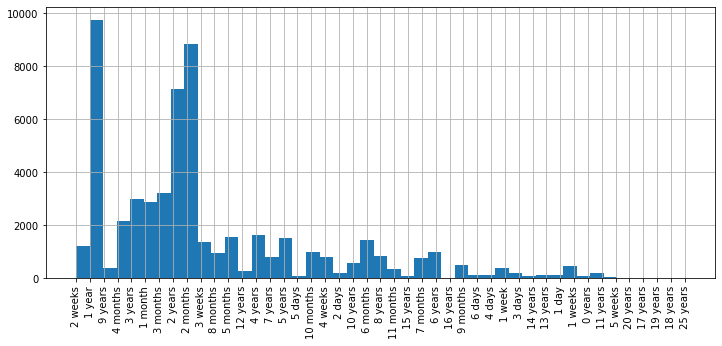

In [28]:
df_final['age_upon_outcome'].hist(xrot=90, bins=45, figsize=(12, 5))

In [29]:
# не получилось, работает по индексам
#asss = df_final['age_upon_outcome'].filter(like='1 day')
#asss

In [30]:
# возможно есть более простой способ посчитать количество элементов, удовлетворяющих условию, хотелось бы его узнать...
count = 0
for i in df_final['age_upon_outcome']:
    if 'day' in i: count += 1 
count

891

Переведем все значения в месеца. Там где речь идет о неделях или днях количество месяцев будет равно 0

In [31]:
df_final['age_upon_outcome']

0         2 weeks
1          1 year
2          1 year
3         9 years
4        4 months
           ...   
56604     1 month
56605     1 month
56606     3 years
56607    2 months
56608    2 months
Name: age_upon_outcome, Length: 56609, dtype: object

In [32]:
df_final['age_upon_outcome_month'] = 1

In [33]:
# Следующая ячейка исполняется около 30 секунд

In [34]:
for i, val in enumerate(df_final['age_upon_outcome']):
    val_split = val.split(' ')
    
    if 'day' in val or 'week' in val:
        df_final.loc[i, 'age_upon_outcome_month'] = int(0)

    if 'month' in val:
        df_final.loc[i, 'age_upon_outcome_month'] = int(val_split[0])
        
    if 'year' in val: 
        df_final.loc[i, 'age_upon_outcome_month'] = int(12 * int(val_split[0]))
        if df_final.loc[i, 'age_upon_outcome_month'] == 0: 
            df_final.loc[i, 'age_upon_outcome_month'] == 11                

In [45]:
df_final.head()

,index,age_upon_outcome,animal_type,outcome_subtype,outcome_type,sex_upon_outcome,age_upon_outcome_month
0,0,2 weeks,Cat,Partner,Transfer,Intact Male,0
1,1,1 year,Dog,Partner,Transfer,Spayed Female,12
2,2,1 year,Dog,Other,Adoption,Neutered Male,12
3,3,9 years,Dog,Partner,Transfer,Neutered Male,108
4,5,4 months,Dog,Partner,Transfer,Intact Male,4


In [46]:
# Удаляем столбец 'index' и 'age_upon_outcome'
df_final = df_final.drop(['index', 'age_upon_outcome'], axis=1)

**5. Обратите внимание на текстовые столбцы. Подумайте, что можно извлечь полезного оттуда**

In [55]:
df_final['sex_upon_outcome'].unique()

array(['Intact Male', 'Spayed Female', 'Neutered Male', 'Intact Female'],
      dtype=object)

In [48]:
df_final[df_final['sex_upon_outcome'] == 'Unknown'].count()

animal_type               2761
outcome_subtype           2761
outcome_type              2761
sex_upon_outcome          2761
age_upon_outcome_month    2761
dtype: int64

In [49]:
# Отбросим строки с полом 'Unknown'
df_final = df_final.drop(df_final[df_final.sex_upon_outcome == 'Unknown'].index)

In [56]:
# Заменем целевые значения 'Adoption' на 1 и 'Transfer' на 0
df_final['outcome_type'] = df_final['outcome_type'].str.contains('Adoption').astype('int8')

In [57]:
df_final.head()

,animal_type,outcome_subtype,outcome_type,sex_upon_outcome,age_upon_outcome_month
0,Cat,Partner,0,Intact Male,0
1,Dog,Partner,0,Spayed Female,12
2,Dog,Other,1,Neutered Male,12
3,Dog,Partner,0,Neutered Male,108
4,Dog,Partner,0,Intact Male,4


In [58]:
# Разложим по OHE столбец 'animal_type' и столбец 'sex_upon_outcome'
from sklearn import preprocessing

In [94]:
animal_type = df_final['animal_type'].to_numpy().reshape(-1, 1)

In [95]:
oh_encoder = preprocessing.OneHotEncoder()
oh_encoder.fit(animal_type)
oh_result1 = oh_encoder.transform(animal_type).toarray()
#oh_result1

In [96]:
sex_upon_outcome = df_final['sex_upon_outcome'].to_numpy().reshape(-1, 1)

In [97]:
oh_encoder = preprocessing.OneHotEncoder()
oh_encoder.fit(sex_upon_outcome)
oh_result2 = oh_encoder.transform(sex_upon_outcome).toarray()
#oh_result2

In [98]:
animal_type_columns = ['animal_type_gr-{}'.format(i) for i in range(oh_result1.shape[1])]
animal_type_columns_df = pd.DataFrame(oh_result1, columns=animal_type_columns)

animal_type_columns_df.index = df_final.index

df_2_model = pd.concat([df_final, animal_type_columns_df], axis=1)

In [99]:
sex_columns = ['sex_gr-{}'.format(i) for i in range(oh_result2.shape[1])]
sex_columns_df = pd.DataFrame(oh_result2, columns=sex_columns)

sex_columns_df.index = df_final.index

df_2_model = pd.concat([df_2_model, sex_columns_df], axis=1)

In [100]:
df_2_model.head()

,animal_type,outcome_subtype,outcome_type,sex_upon_outcome,age_upon_outcome_month,animal_type_gr-0,animal_type_gr-1,animal_type_gr-2,animal_type_gr-3,sex_gr-0,sex_gr-1,sex_gr-2,sex_gr-3
0,Cat,Partner,0,Intact Male,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,Dog,Partner,0,Spayed Female,12,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,Dog,Other,1,Neutered Male,12,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,Dog,Partner,0,Neutered Male,108,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,Dog,Partner,0,Intact Male,4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [101]:
df_2_model_drop = df_2_model.drop(['animal_type', 'sex_upon_outcome', 'outcome_subtype'], axis=1)

In [102]:
# Отбор столбцов для первой модели

In [111]:
X = df_2_model_drop.drop(['outcome_type'], axis=1)
y = df_2_model_drop['outcome_type']

In [112]:
X

,age_upon_outcome_month,animal_type_gr-0,animal_type_gr-1,animal_type_gr-2,animal_type_gr-3,sex_gr-0,sex_gr-1,sex_gr-2,sex_gr-3
0,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,12,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,12,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,108,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
56604,1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
56605,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
56606,36,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
56607,2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [113]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

In [114]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

estimator = LinearRegression()
estimator.fit(X_train, y_train) # Обучение


y_pred = estimator.predict(X_test)

print("R2: \t", r2_score(y_test, y_pred))
print("RMSE: \t", np.sqrt(mean_squared_error(y_test, y_pred)))
print("MAE: \t", mean_absolute_error(y_test, y_pred))

R2: 	 0.3656690094989551
RMSE: 	 0.38773190155896503
MAE: 	 0.3014619643408421


**Вывод:** линейная регререссия дает не очень хороший результат предсказания.

In [116]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score 

model = LogisticRegression()
model.fit(X_train, y_train)

predicted_classes = model.predict(X_test)
accuracy = accuracy_score(y_test, predicted_classes)

print('Точность предсказания модели: ', accuracy)
parameters = model.coef_

Точность предсказания модели:  0.8027855153203343


C:\Users\PC-Home\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


**Вывод:** если я правильно понимаю, то логистическая регререссия дает хороший результат предсказания, на основе пола животного, его возраста и его типа.